In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [124]:
from sklearn.datasets import make_circles, make_moons, make_blobs

X, y = make_circles(n_samples=1000, noise= 0.10, factor = 0.4)
X1, y1 = make_moons(n_samples= 1000, noise= 0.15 )
X2,y2 = make_blobs(n_samples=1000, n_features=2, cluster_std= 0.9)

In [125]:
X.shape


(1000, 2)

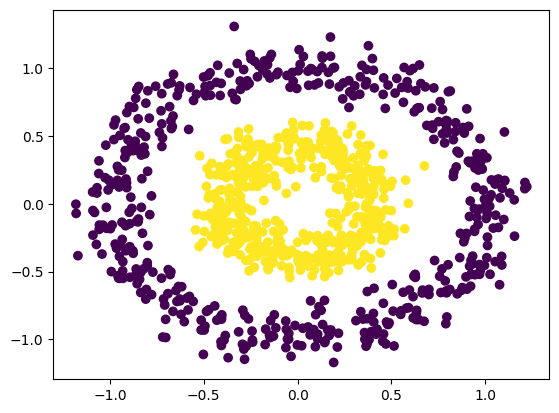

In [126]:
plt.scatter(X[:,0], X[:,1], c = y)

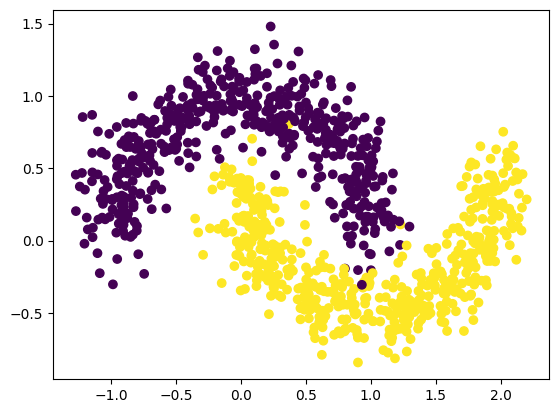

In [127]:
plt.scatter(X1[:,0], X1[:,1], c = y1)

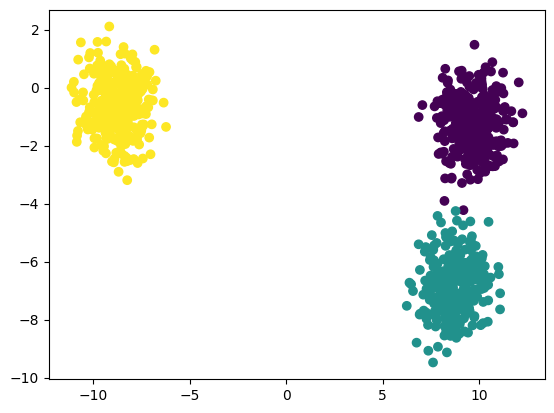

In [128]:
plt.scatter(X2[:,0], X2[:,1], c = y2)

In [129]:
outliers = np.random.uniform(low=-10, high=10, size=(100, 2))
X2 = np.concatenate([X2, outliers])

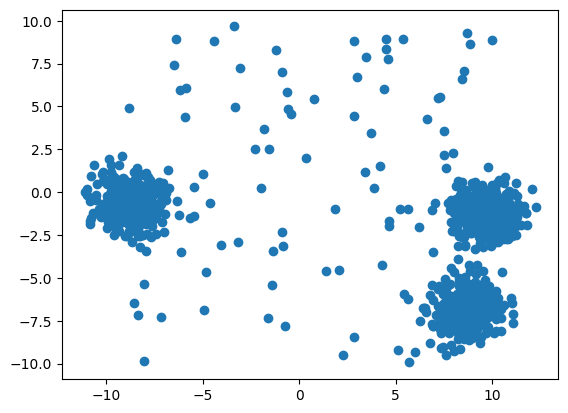

In [130]:
plt.scatter(X2[:,0], X2[:,1])

## ***ISOLATION FOREST***

In [131]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(n_estimators=100, contamination = 0.2 )

In [132]:
pred = iso.fit_predict(X2)

### ***ANOMALY FOR CLUSTERS***

Text(0.5, 1.0, 'Isolation Forest')

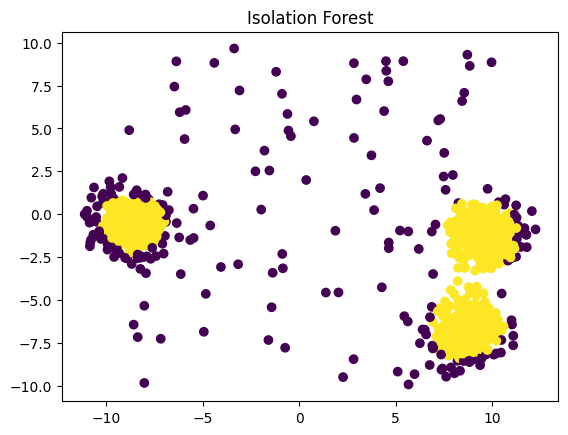

In [133]:
plt.scatter(X2[:,0], X2[:,1], c = pred)
plt.title("Isolation Forest")

In [134]:
pred = iso.fit_predict(X)

###***ANOMALY FOR CIRCLES***

Text(0.5, 1.0, 'Isolation Forest Not able to differentiate between 2 clusters')

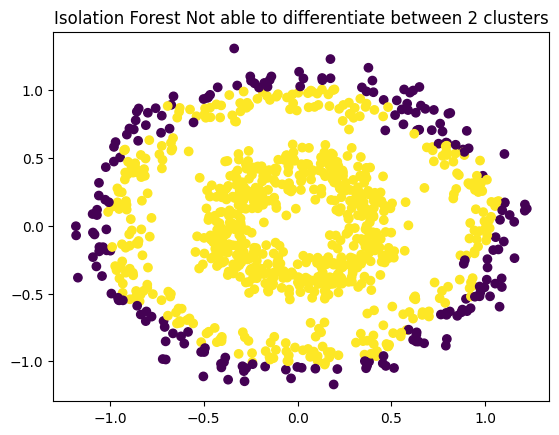

In [135]:
plt.scatter(X[:,0], X[:,1], c = pred)
plt.title("Isolation Forest Not able to differentiate between 2 clusters")


In [136]:
pred = iso.fit_predict(X1)

### ***ANOMALY FOR MOONS***

Text(0.5, 1.0, 'Isolation Forest Not able to differentiate between 2 clusters')

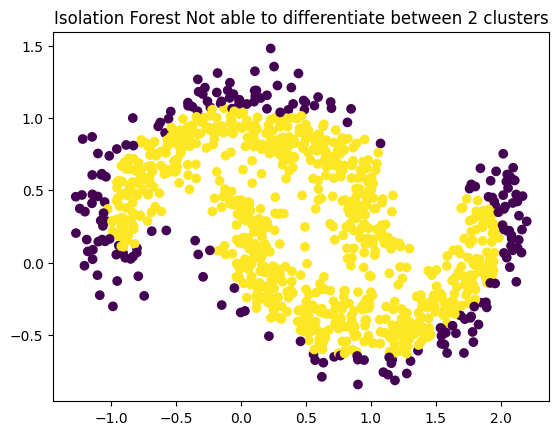

In [137]:
plt.scatter(X1[:,0], X1[:,1], c = pred)
plt.title("Isolation Forest Not able to differentiate between 2 clusters")

## ***DB SCAN***

In [151]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=0.1)


In [152]:
pred = db.fit_predict(X)

###***ANOMALY FOR CIRCLES***

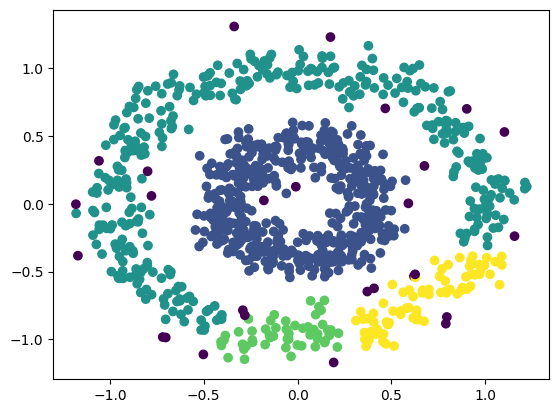

In [153]:
plt.scatter(X[:,0], X[:,1], c = db.labels_)
plt.title('DB SCAN able to differentiate between the clusters')

In [154]:
pred = db.fit_predict(X1)

###***ANOMALY FOR MOONS***

Text(0.5, 1.0, 'DBSCAN')

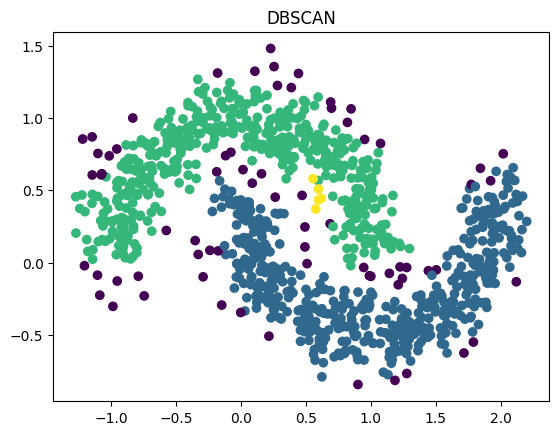

In [155]:
plt.scatter(X1[:,0], X1[:,1], c = pred)
plt.title("DBSCAN able to differentiate between clusters and outliers")

###***ANOMALY FOR CLUSTERS***

In [159]:
pred = db.fit_predict(X2)

Text(0.5, 1.0, 'Db scan not able to differentiate based on the current epsilon value')

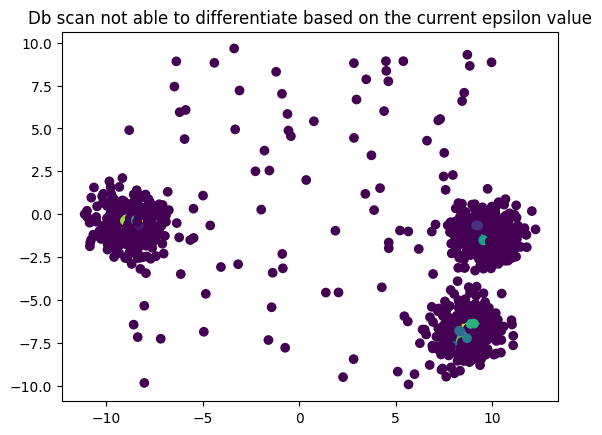

In [161]:
plt.scatter(X2[:,0], X2[:,1], c = pred)
plt.title("Db scan not able to differentiate based on the current epsilon value")

### **TUNING**

In [165]:
db = DBSCAN(eps=0.6)

In [166]:
pred = db.fit_predict(X2)

Text(0.5, 1.0, 'Db scan now able to differentiate')

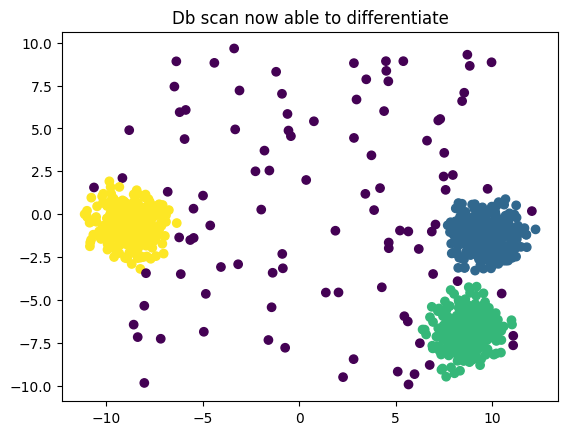

In [168]:
plt.scatter(X2[:,0], X2[:,1], c = pred)
plt.title("Db scan now able to differentiate")

## ***LOCAL OUTLIER FACTOR***

In [182]:
from sklearn.neighbors import LocalOutlierFactor

LF = LocalOutlierFactor(n_neighbors=10, contamination='auto' )

In [183]:
pred = LF.fit_predict(X)

###***ANOMALY FOR CIRCLES***

Text(0.5, 1.0, 'LOF Anomalies')

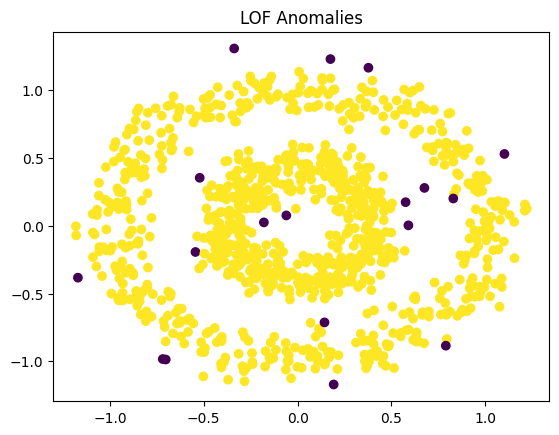

In [185]:
### Will not able to diffrentiate between clusters but has done a good job on anomalies

plt.scatter(X[:,0], X[:,1], c = pred)
plt.title("LOF Anomalies")


In [186]:
pred = LF.fit_predict(X1)

###***ANOMALY FOR MOONS***

Text(0.5, 1.0, 'LOF Anomalies')

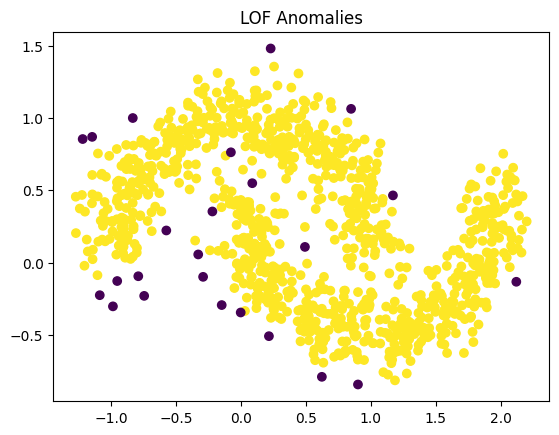

In [187]:
plt.scatter(X1[:,0], X1[:,1], c = pred)
plt.title("LOF Anomalies")


In [188]:
pred = LF.fit_predict(X2)

###***ANOMALY FOR CLUSTERS***

Text(0.5, 1.0, 'LOF Anomalies')

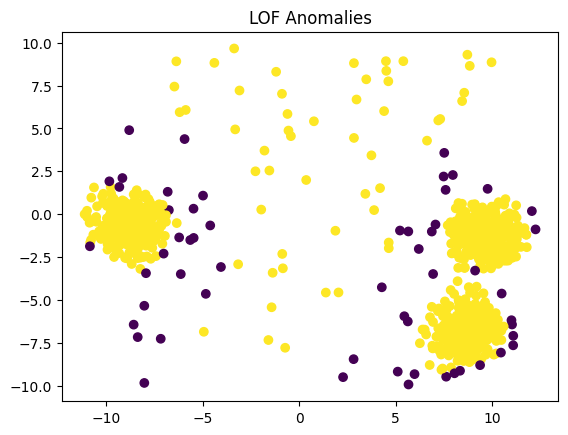

In [189]:
plt.scatter(X2[:,0], X2[:,1], c = pred)
plt.title("LOF Anomalies")


### **TUNING**

In [210]:
LF = LocalOutlierFactor(n_neighbors= 40, contamination='auto')

In [211]:
pred = LF.fit_predict(X2)

Text(0.5, 1.0, 'LOF Anomalies')

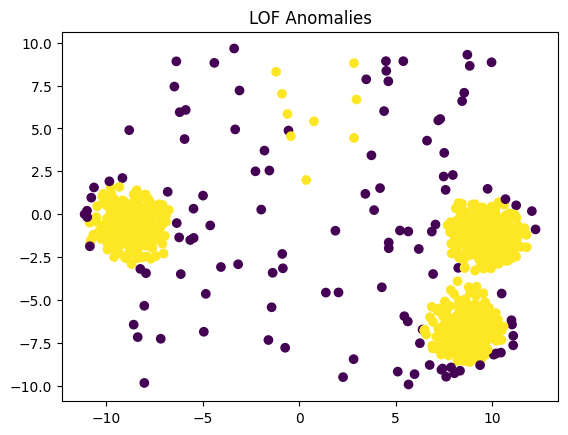

In [213]:
### Here we need to select the Neighbours accordingly to get optimal results

plt.scatter(X2[:,0], X2[:,1], c = pred)
plt.title("LOF Anomalies")